In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def pagerank(graph, alpha=0.85, tol=1e-6, max_iter=100):
    nodes = list(graph.keys())
    N = len(nodes)
    
    # Initialize rank values
    rank = np.ones(N) / N  
    M = np.zeros((N, N))  

    # Build transition matrix
    for i, node in enumerate(nodes):
        if graph[node]:  
            for link in graph[node]:
                j = nodes.index(link)
                M[j, i] = 1 / len(graph[node])  

    convergence = []
    for _ in range(max_iter):
        new_rank = alpha * M @ rank + (1 - alpha) / N
        diff = np.linalg.norm(new_rank - rank, 1)  
        convergence.append(diff)
        
        if diff < tol:  
            break  
        rank = new_rank  

    return {nodes[i]: rank[i] for i in range(N)}, convergence

In [8]:
graph = {
    1: [2, 3, 4, 5],
    2: [3],
    3: [1],
    4: [2, 3, 5],
    5: [1, 4],
    6: [5, 1],
    7: [5, 1]
}

# Run PageRank
pagerank_scores, convergence = pagerank(graph)

In [9]:
print("Final PageRank Scores:")
for node, score in sorted(pagerank_scores.items()):
    print(f"Node {node}: {score:.6f}")

Final PageRank Scores:
Node 1: 0.301600
Node 2: 0.127267
Node 3: 0.235445
Node 4: 0.147348
Node 5: 0.145482
Node 6: 0.021429
Node 7: 0.021429


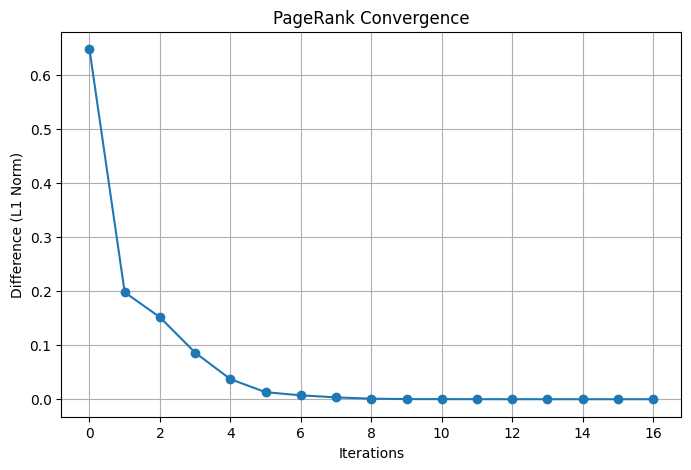

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(convergence, marker='o', linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Difference (L1 Norm)")
plt.title("PageRank Convergence")
plt.grid(True)
plt.show()